# EDA & Modelling

## Package loading

In [1]:
from EZS_deps.EZS_func import *
import numpy as np
import pandas as pd
import os
import gc
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import re
import math
import keras
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.inspection import permutation_importance
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import WhiteKernel
from sklearn.gaussian_process.kernels import ConstantKernel
from sklearn.gaussian_process.kernels import Matern
from sklearn.gaussian_process.kernels import RationalQuadratic
from sklearn.gaussian_process.kernels import ExpSineSquared
from sklearn.gaussian_process.kernels import DotProduct
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn import set_config
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.naive_bayes import GaussianNB
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import EarlyStopping
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.layers import LayerNormalization
from keras.layers import Dropout
from keras.models import Sequential
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model
from pandas.api.types import is_numeric_dtype
from itertools import product
from joblib import dump
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer


2022-06-28 13:54:32.849471: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-28 13:54:32.849501: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Exploratory Data Analysis 

### File and parameters loading

In [119]:
problem_type = 'classification'

In [120]:
stacking = 'True'

In [121]:
data_size = 'small'

In [122]:
df = pd.read_csv('/home/phbillet/Documents/python project/EZStacking-main/dataset/titanic.csv')

In [123]:
target_col = 'survived'

#### Thresholds

In [124]:
threshold_NaN = 0.5

In [125]:
threshold_cat = 5

In [126]:
threshold_Z = 3.0

In [127]:
test_size = 0.33

In [128]:
threshold_entropy = 0.75

In [129]:
threshold_corr = 0.95

In [130]:
threshold_model = 5

In [131]:
threshold_score = 0.7

In [132]:
threshold_feature = 5

#### Drop user's columns:
* 1st round : the columns 'alive' and 'survived' are completely correlated
* 2nd round : the columns 'deck' and 'embark_town' are correlated with other features
* 3rd round : the columns 'adult_male', 'age', 'alone', 'fare', 'parch' and 'sex' do not have importance enough. 


In [133]:
user_drop_cols = ['alive', 'deck', 'embark_town', 'adult_male', 'age', 'alone', 'fare', 'parch', 'sex']


Dataset before deletion

In [134]:
display(df)

survived  pclass     sex   age  sibsp  parch     fare embarked  \
0           0       3    male  22.0      1      0   7.2500        S   
1           1       1  female  38.0      1      0  71.2833        C   
2           1       3  female  26.0      0      0   7.9250        S   
3           1       1  female  35.0      1      0  53.1000        S   
4           0       3    male  35.0      0      0   8.0500        S   
..        ...     ...     ...   ...    ...    ...      ...      ...   
886         0       2    male  27.0      0      0  13.0000        S   
887         1       1  female  19.0      0      0  30.0000        S   
888         0       3  female   NaN      1      2  23.4500        S   
889         1       1    male  26.0      0      0  30.0000        C   
890         0       3    male  32.0      0      0   7.7500        Q   

    cabin_class    who  adult_male deck  embark_town alive  alone  
0         Third    man        True  NaN  Southampton    no  False  
1         First  woman       False    C    Cherbourg   yes  False  
2         Third  woman       False  NaN  Southampton   yes   True  
3         First  woman       False    C  Southampton   yes  False  
4         Third    man        True  NaN  Southampton    no   True  
..          ...    ...         ...  ...          ...   ...    ...  
886      Second    man        True  NaN  Southampton    no   True  
887       First  woman       False    B  Southampton   yes   True  
888       Third  woman       False  NaN  Southampton    no  False  
889       First    man        True    C    Cherbourg   yes   True  
890       Third    man        True  NaN   Queenstown    no   True  

[891 rows x 15 columns]

In [135]:
df = df.drop(user_drop_cols, axis=1)

Dataset after deletion

In [136]:
display(df)

survived  pclass  sibsp embarked cabin_class    who
0           0       3      1        S       Third    man
1           1       1      1        C       First  woman
2           1       3      0        S       Third  woman
3           1       1      1        S       First  woman
4           0       3      0        S       Third    man
..        ...     ...    ...      ...         ...    ...
886         0       2      0        S      Second    man
887         1       1      0        S       First  woman
888         0       3      1        S       Third  woman
889         1       1      0        C       First    man
890         0       3      0        Q       Third    man

[891 rows x 6 columns]

#### Dataset copy

In [137]:
df_copy = df.copy()

### Dataset Information

In [138]:
df.shape

(891, 6)

#### Some records

In [139]:
display(df)

survived  pclass  sibsp embarked cabin_class    who
0           0       3      1        S       Third    man
1           1       1      1        C       First  woman
2           1       3      0        S       Third  woman
3           1       1      1        S       First  woman
4           0       3      0        S       Third    man
..        ...     ...    ...      ...         ...    ...
886         0       2      0        S      Second    man
887         1       1      0        S       First  woman
888         0       3      1        S       Third  woman
889         1       1      0        C       First    man
890         0       3      0        Q       Third    man

[891 rows x 6 columns]

#### Dataframe structure

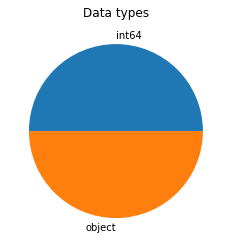

In [140]:
plot_dataframe_structure(df)

#### Dataframe statistics

In [141]:
display(df.describe().T)

count      mean       std  min  25%  50%  75%  max
survived  891.0  0.383838  0.486592  0.0  0.0  0.0  1.0  1.0
pclass    891.0  2.308642  0.836071  1.0  2.0  3.0  3.0  3.0
sibsp     891.0  0.523008  1.102743  0.0  0.0  0.0  1.0  8.0

#### Which columns could be categorical ?

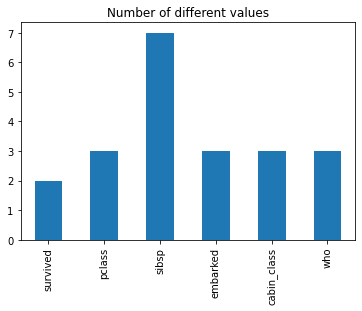

In [142]:
plot_categorical(df)

### Dataset Cleaning

#### Duplicate rows:

In [143]:
duplicates(df)

Number of rows before removing: 891
Number of duplicate rows: 792
Number of rows after removing: 99


survived  pclass  sibsp embarked cabin_class    who
0           0       3      1        S       Third    man
1           1       1      1        C       First  woman
2           1       3      0        S       Third  woman
3           1       1      1        S       First  woman
4           0       3      0        S       Third    man
..        ...     ...    ...      ...         ...    ...
657         0       3      1        Q       Third  woman
660         1       1      2        S       First    man
726         1       2      3        S      Second  woman
731         0       3      0        C       Third  child
827         1       2      0        C      Second  child

[99 rows x 6 columns]

#### Drop NaN:

In [144]:
df, drop_cols = drop_na(df, threshold_NaN)

Drop columns containing more than 50.0 % of NaN: []


Set of dropped columns: NaN

In [145]:
dropped_cols = np.unique(np.concatenate((drop_cols, user_drop_cols)))

In [146]:
display(dropped_cols)

array(['adult_male', 'age', 'alive', 'alone', 'deck', 'embark_town',
       'fare', 'parch', 'sex'], dtype=object)

#### Encoding data:

In [147]:
df, encoded_cols = encoding(df, threshold_cat, target_col)

Column  survived  is categorical.
Column  pclass  is categorical.
Encoding numeric column: sibsp
Encoding object column: embarked
Encoding object column: cabin_class
Encoding object column: who


#### Imputing NaN using IterativeImputer

##### Imputation

In [148]:
df = imputation(df)

No need to impute data.


#### Data compression:

In [149]:
df = downcast_dtypes(df)

Memory usage of dataframe is 0.04MB
Memory usage after optimization is: 0.01MB
Decreased by 85.2%


##### Dataframe structure after compression

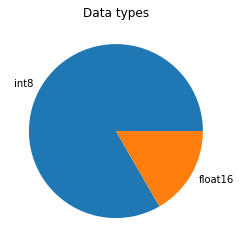

In [150]:
plot_dataframe_structure(df)

#### Outliers:

In [151]:
df = outliers(df, threshold_Z)

Using Z_score,  30  rows will be suppressed.


#### Correlation

In [152]:
corr = df.corr() 
corr.style.background_gradient(cmap='coolwarm')

In [153]:
correlated_features = correlated_columns(df, threshold_corr, target_col) 
dropped_cols = np.unique(np.concatenate((drop_cols, correlated_features)))

#### Check columns that should be dropped

In [154]:
print(dropped_cols)

[]


## Splittings 

In [155]:
df = df_copy

#### Splitting dataframe in features and targets

In [156]:
y = df[target_col]

In [157]:
X = df.drop(target_col, axis=1)

##### Dimensions

In [158]:
nb_features = len(X.columns.tolist())

In [159]:
nb_targets = len(y.unique())

In [160]:
layer_size = nb_features + nb_targets + 2

##### Splitting data in train and test sets 

In [161]:
X_train, X_test, y_train, y_test = split(X, y, test_size=test_size, threshold_entropy=threshold_entropy)

##### Encoding

In [162]:
target_encoder = LabelEncoder() 
y_train = pd.Series(target_encoder.fit_transform(y_train)) 
y_test = pd.Series(target_encoder.transform(y_test))

## Modelling

### Model building

#### Pipeline building

##### Select the categorical and numerical columns

In [163]:
cat_selector = make_column_selector(dtype_include=object)

In [164]:
num_selector = make_column_selector(dtype_include=np.number)

##### For models based on tree

In [165]:
cat_tree_processor = make_pipeline(SimpleImputer(strategy='most_frequent'), OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))

In [166]:
num_tree_processor = make_pipeline(SimpleImputer(strategy='mean', add_indicator=True))

In [167]:
tree_preprocessor = make_pipeline(make_column_transformer((num_tree_processor, num_selector), (cat_tree_processor, cat_selector)), Decorrelator(threshold_corr))

##### For models not based on tree

In [168]:
cat_ntree_processor = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore', sparse=False))

In [169]:
num_ntree_processor = make_pipeline(SimpleImputer(strategy='mean', add_indicator=True), StandardScaler())

In [170]:
ntree_preprocessor = make_pipeline(make_column_transformer((num_ntree_processor, num_selector), (cat_ntree_processor, cat_selector)), Decorrelator(threshold_corr))

##### Keras neural network definition

In [171]:
def K_Class(): 
    keras.backend.clear_session() 
#   neural network architecture: start 
    model = Sequential() 
    model.add(Dense(10 * layer_size, activation='relu')) 
    model.add(BatchNormalization()) 
    model.add(Dropout(0.5)) 
#    model.add(LayerNormalization()) 
    model.add(Dense(layer_size, activation='relu')) 
    model.add(BatchNormalization()) 
    model.add(Dropout(0.5)) 
#    model.add(LayerNormalization()) 
    model.add(Dense(nb_targets, activation='softmax')) 
#   neural network architecture: end   
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


##### Early Stopping

In [172]:
es = EarlyStopping(monitor='val_loss', mode='auto', verbose=1, patience=20)

In [173]:
K_C = KerasClassifier(K_Class, batch_size=64, epochs=2000, callbacks=[es], validation_split=0.1, verbose=1) 
K_C._estimator_type = 'classifier'

##### Level-0 models

In [174]:
level_0 = [ 
          ('GPCL', make_pipeline(ntree_preprocessor, GaussianProcessClassifier(kernel = ConstantKernel() * DotProduct() + ConstantKernel() + WhiteKernel()))), 
          ('GPCR', make_pipeline(ntree_preprocessor, GaussianProcessClassifier(kernel = ConstantKernel() * RBF() + ConstantKernel() + WhiteKernel()))), 
          ('GPCQ', make_pipeline(ntree_preprocessor, GaussianProcessClassifier(kernel = ConstantKernel() * RationalQuadratic() + ConstantKernel() + WhiteKernel()))), 
          ('DTCG', make_pipeline(ntree_preprocessor, DecisionTreeClassifier(criterion='gini'))), 
          ('DTCE', make_pipeline(ntree_preprocessor, DecisionTreeClassifier(criterion='entropy'))), 
          ('RFCG', make_pipeline(ntree_preprocessor, RandomForestClassifier(criterion='gini', n_estimators=50))), 
          ('RFCE', make_pipeline(ntree_preprocessor, RandomForestClassifier(criterion='entropy', n_estimators=50))), 
          ('ABC', make_pipeline(ntree_preprocessor, AdaBoostClassifier())), 
          ('HGBC', make_pipeline(ntree_preprocessor, HistGradientBoostingClassifier(early_stopping=True))), 
          ('LOGRL', make_pipeline(ntree_preprocessor, LogisticRegression(solver='lbfgs', penalty='l2'))), 
          ('LOGRS', make_pipeline(ntree_preprocessor, LogisticRegression(solver='saga', penalty='elasticnet', l1_ratio=0.15))), 
          ('LOGRLCV', make_pipeline(ntree_preprocessor, LogisticRegressionCV(cv=5, solver='lbfgs', penalty='l2'))), 
          ('LOGRSCV', make_pipeline(ntree_preprocessor, LogisticRegressionCV(cv=5, solver='saga', penalty='l2'))), 
          ('MLPC10', make_pipeline(ntree_preprocessor, MLPClassifier(hidden_layer_sizes = (10 * layer_size, 10 * layer_size,), max_iter=1000, early_stopping=True))), 
          ('MLPC20', make_pipeline(ntree_preprocessor, MLPClassifier(hidden_layer_sizes = (20 * layer_size, 20 * layer_size,), max_iter=1000, early_stopping=True))), 
          ('KNCU', make_pipeline(ntree_preprocessor, KNeighborsClassifier(weights='uniform', n_neighbors=len(y.unique())))), 
          ('KNCD', make_pipeline(ntree_preprocessor, KNeighborsClassifier(weights='distance', n_neighbors=len(y.unique())))), 
          ('GNB', make_pipeline(ntree_preprocessor, GaussianNB())), 
          ('KERC', make_pipeline(ntree_preprocessor, K_C)), 
          ]

##### Level-1 model

In [175]:
level_1 = LogisticRegressionCV(cv=5, solver='saga', penalty='elasticnet', l1_ratios=[0.1, 0.5, 0.9], n_jobs=-1)

##### Stacking for classification

In [176]:
model = StackingClassifier(level_0, final_estimator=level_1)

### Model fitting

In [177]:
%%time 
set_config(display='diagram') 
model.fit(X_train, y_train)

Epoch 1/2000
9/9 [==============================] - 1s 37ms/step - loss: 1.0275 - accuracy: 0.5373 - val_loss: 0.6320 - val_accuracy: 0.7500
Epoch 2/2000
9/9 [==============================] - 0s 7ms/step - loss: 0.8248 - accuracy: 0.5933 - val_loss: 0.6126 - val_accuracy: 0.7333
Epoch 3/2000
9/9 [==============================] - 0s 7ms/step - loss: 0.8134 - accuracy: 0.6474 - val_loss: 0.6044 - val_accuracy: 0.8000
Epoch 4/2000
9/9 [==============================] - 0s 7ms/step - loss: 0.7591 - accuracy: 0.6381 - val_loss: 0.5986 - val_accuracy: 0.8000
Epoch 5/2000
9/9 [==============================] - 0s 7ms/step - loss: 0.7224 - accuracy: 0.6847 - val_loss: 0.5941 - val_accuracy: 0.8167
Epoch 6/2000
9/9 [==============================] - 0s 7ms/step - loss: 0.6402 - accuracy: 0.6903 - val_loss: 0.5902 - val_accuracy: 0.8333
Epoch 7/2000
9/9 [==============================] - 0s 7ms/step - loss: 0.6694 - accuracy: 0.6847 - val_loss: 0.5853 - val_accuracy: 0.8500
Epoch 8/2000
9/9 [=

StackingClassifier(estimators=[('GPCL',
                                Pipeline(steps=[('pipeline',
                                                 Pipeline(steps=[('columntransformer',
                                                                  ColumnTransformer(transformers=[('pipeline-1',
                                                                                                   Pipeline(steps=[('simpleimputer',
                                                                                                                    SimpleImputer(add_indicator=True)),
                                                                                                                   ('standardscaler',
                                                                                                                    StandardScaler())]),
                                                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7f5ec87b55d0>),
                                                                                                  ('pipeline-2...
                                                                                                                                  sparse=False))]),
                                                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7f5ec87b69e0>)])),
                                                                 ('decorrelator',
                                                                  Decorrelator(threshold=0.95))])),
                                                ('kerasclassifier',
                                                 <keras.wrappers.scikit_learn.KerasClassifier object at 0x7f5ec87b7a30>)]))],
                   final_estimator=LogisticRegressionCV(cv=5,
                                                        l1_ratios=[0.1, 0.5,
                                                                   0.9],
                                                        n_jobs=-1,
                                                        penalty='elasticnet',
                                                        solver='saga'))

### Model evaluation

#### Model scoring

10/10 [==============================] - 0s 2ms/step


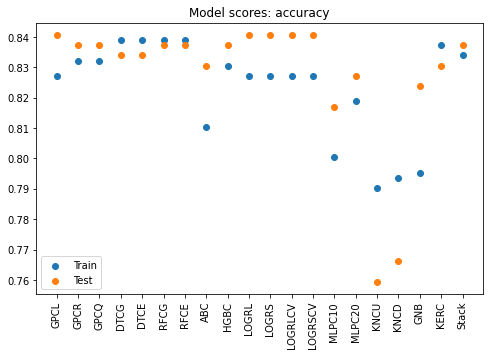

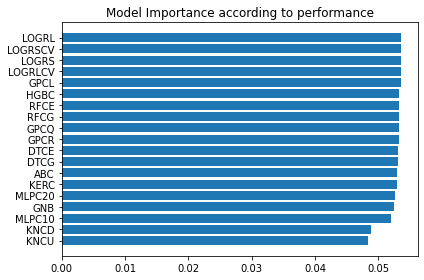

In [178]:
score_stack, mod_imp_score = score_stacking(model, X_train, y_train, X_test, y_test)

#### Model importance

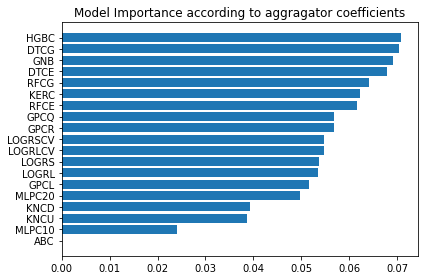

In [179]:
model_imp = plot_model_importance(model)

#### Feature permutation importance (a posteriori)

10/10 [==============================] - 0s 2ms/step
INFO:tensorflow:Assets written to: ram://00f3db06-14c2-4148-bacc-50dd69a5c642/assets
INFO:tensorflow:Assets written to: ram://c83cd072-79c6-48cf-9871-633d70f3cce9/assets


2022-06-28 14:12:30.682995: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-28 14:12:30.683038: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


INFO:tensorflow:Assets written to: ram://d43267fb-155b-4ce2-b074-715581849f41/assets


2022-06-28 14:12:34.076818: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-28 14:12:34.076880: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-28 14:12:34.076913: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (phbillet-x405ua): /proc/driver/nvidia/version does not exist
2022-06-28 14:12:34.077259: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-28 14:12:34.352738: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load 

INFO:tensorflow:Assets written to: ram://7883c65f-bca1-42fa-995e-a4ebcff45d4b/assets
10/10 [==============================] - 0s 4ms/step


2022-06-28 14:12:37.123466: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-28 14:12:37.123531: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


10/10 [==============================] - 0s 3ms/step


2022-06-28 14:12:38.048800: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-28 14:12:38.048852: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-28 14:12:38.048886: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (phbillet-x405ua): /proc/driver/nvidia/version does not exist
2022-06-28 14:12:38.049364: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


10/10 [==============================] - 0s 3ms/step
INFO:tensorflow:Assets written to: ram://160ee72e-acd6-4d62-acc5-8751a3ef4ee3/assets
10/10 [==============================] - 0s 3ms/step


2022-06-28 14:12:40.939165: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-28 14:12:40.939704: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-28 14:12:40.939811: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (phbillet-x405ua): /proc/driver/nvidia/version does not exist
2022-06-28 14:12:40.940457: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-28 14:12:40.943789: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load 

10/10 [==============================] - 0s 2ms/step


2022-06-28 14:12:44.343711: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-28 14:12:44.344186: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-28 14:12:44.344295: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (phbillet-x405ua): /proc/driver/nvidia/version does not exist
2022-06-28 14:12:44.344722: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


10/10 [==============================] - 0s 2ms/step


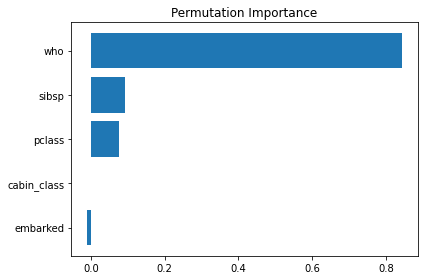

array([['embarked', -0.01085776330075994],
       ['cabin_class', -0.0010857763300758804],
       ['pclass', 0.07709011943539631],
       ['sibsp', 0.09120521172638432],
       ['who', 0.8436482084690552]], dtype=object)

In [180]:
plot_perm_importance(model, X_test, y_test)

#### Partial Dependence & Individual Conditional Expectation 

##### Features of interest

In [181]:
features_of_interest = []

INFO:tensorflow:Assets written to: ram://ddfaee82-459b-45d4-8239-77e26b6274ad/assets
19/19 [==============================] - 0s 2ms/step
INFO:tensorflow:Assets written to: ram://4cbd0273-e90c-4ef1-8d6d-a71d2dd8a957/assets
19/19 [==============================] - 0s 1ms/step


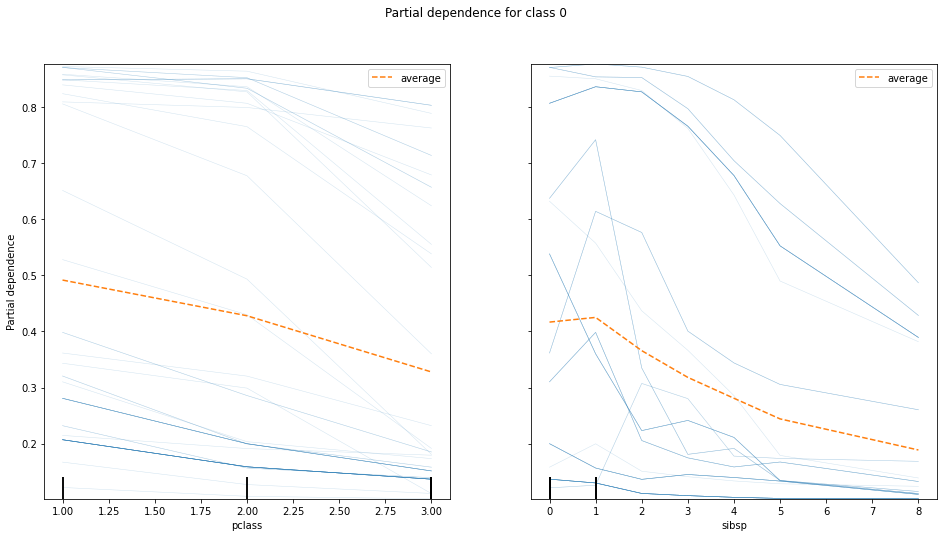

INFO:tensorflow:Assets written to: ram://7f0e4844-4281-4fcb-adc9-87c88d228bd5/assets
19/19 [==============================] - 0s 2ms/step
INFO:tensorflow:Assets written to: ram://89706559-68a1-4365-a2c1-01f7bbc29c43/assets
19/19 [==============================] - 0s 1ms/step


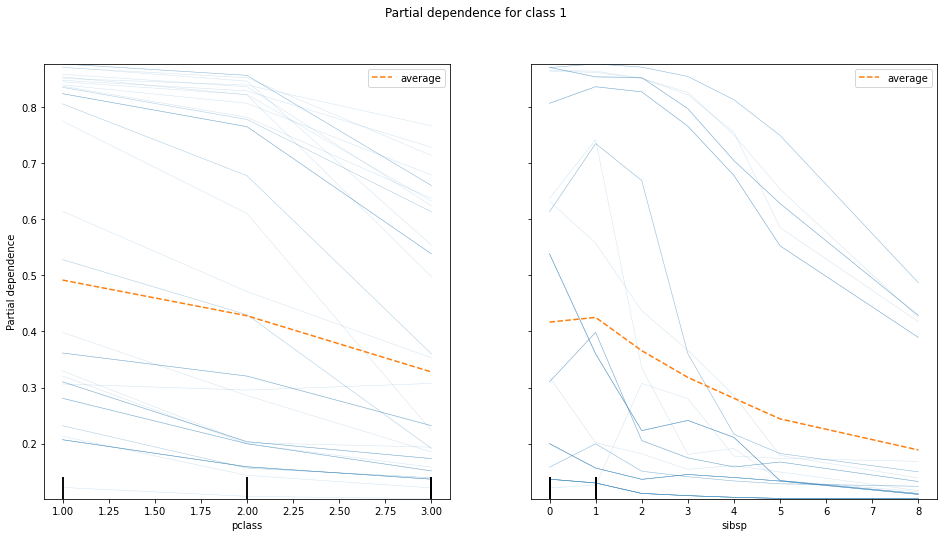

In [182]:
plot_partial_dependence(model, X_train, features_of_interest)

#### Classification report

In [183]:
K_classification_report(model, X_train, y_train, X_test, y_test)

19/19 [==============================] - 0s 2ms/step


10/10 [==============================] - 0s 2ms/step


#### Confusion matrix

19/19 [==============================] - 0s 2ms/step


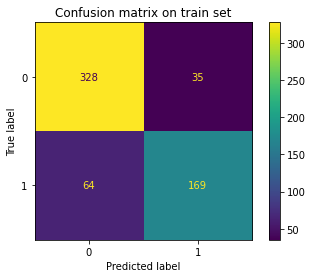

10/10 [==============================] - 0s 2ms/step


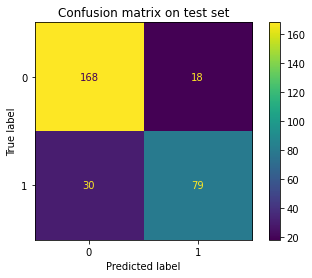

In [184]:
K_confusion_matrix(model, X_train, y_train, X_test, y_test)

### Final Model

In [185]:
threshold_model = 5

In [186]:
threshold_score = 0.7

##### Filtered Level-0 models

In [187]:
level_0_f = model_filtering(level_0, model_imp, threshold_model, score_stack, threshold_score)

##### Final Level-1 model

In [188]:
level_1 = LogisticRegressionCV(cv=5, solver='saga', penalty='elasticnet', l1_ratios=[0.1, 0.5, 0.9], n_jobs=-1)

##### Build final model

In [189]:
model = StackingClassifier(level_0_f, final_estimator=level_1)

### Final Model fitting

In [190]:
%%time 
set_config(display='diagram') 
model.fit(X_train, y_train)

CPU times: user 6.2 s, sys: 32.5 ms, total: 6.23 s
Wall time: 2.6 s


StackingClassifier(estimators=[('DTCG',
                                Pipeline(steps=[('pipeline',
                                                 Pipeline(steps=[('columntransformer',
                                                                  ColumnTransformer(transformers=[('pipeline-1',
                                                                                                   Pipeline(steps=[('simpleimputer',
                                                                                                                    SimpleImputer(add_indicator=True)),
                                                                                                                   ('standardscaler',
                                                                                                                    StandardScaler())]),
                                                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7f5ec87b55d0>),
                                                                                                  ('pipeline-2...
                                                                                                                   ('onehotencoder',
                                                                                                                    OneHotEncoder(handle_unknown='ignore',
                                                                                                                                  sparse=False))]),
                                                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7f5ec87b69e0>)])),
                                                                 ('decorrelator',
                                                                  Decorrelator(threshold=0.95))])),
                                                ('gaussiannb',
                                                 GaussianNB())]))],
                   final_estimator=LogisticRegressionCV(cv=5,
                                                        l1_ratios=[0.1, 0.5,
                                                                   0.9],
                                                        n_jobs=-1,
                                                        penalty='elasticnet',
                                                        solver='saga'))

#### Final Model scoring

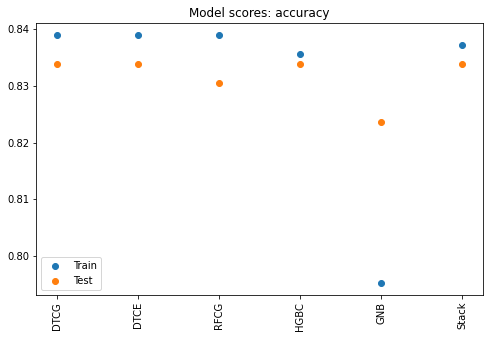

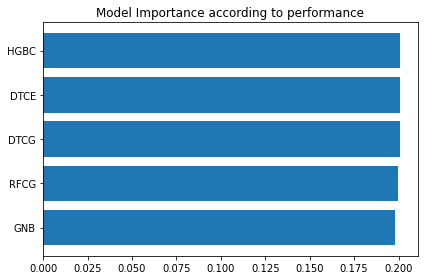

(array([['DTCG', 0.8389261744966443, 0.8338983050847457],
        ['DTCE', 0.8389261744966443, 0.8338983050847457],
        ['RFCG', 0.8389261744966443, 0.8305084745762712],
        ['HGBC', 0.8355704697986577, 0.8338983050847457],
        ['GNB', 0.7953020134228188, 0.823728813559322],
        ['Stack', 0.837248322147651, 0.8338983050847457]], dtype=object),
 array([['GNB', 0.19820554649265906],
        ['RFCG', 0.19983686786296903],
        ['DTCG', 0.200652528548124],
        ['DTCE', 0.200652528548124],
        ['HGBC', 0.200652528548124]], dtype=object))

In [191]:
score_stacking(model, X_train, y_train, X_test, y_test)

#### Final feature permutation importance

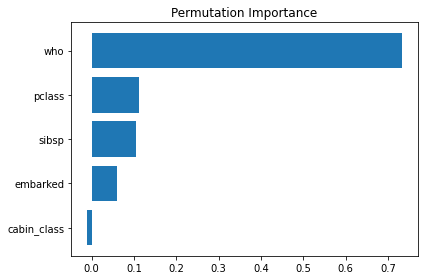

In [192]:
feature_importance = plot_perm_importance(model, X_test, y_test)

##### Final feature elimination

In [193]:
best_feature, worst_feature = feature_filtering(feature_importance, threshold_feature)

In [194]:
dropped_cols = np.unique(np.concatenate((dropped_cols, worst_feature))).tolist()

#### Check those columns, they should be dropped

In [195]:
print(dropped_cols)

[]


#### Final Classification report

In [196]:
K_classification_report(model, X_train, y_train, X_test, y_test)

#### Final Confusion matrix

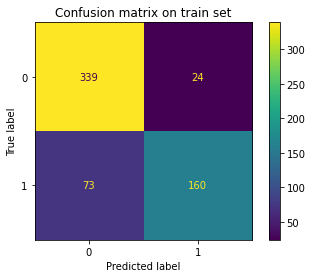

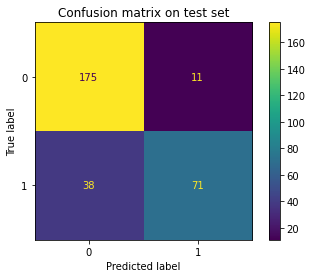

In [197]:
K_confusion_matrix(model, X_train, y_train, X_test, y_test)

## Deployment

### Save your model

In [198]:
model_name = 'model.sav' 
dump(model, model_name)

['model.sav']

### Generate your server

In [199]:
fastapi_server(model, 'model.sav', X, y)

### [Test your API](./server.ipynb)